In [2]:
from google.colab import drive 
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [4]:
import gzip
import numpy as np
from keras.utils import to_categorical

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)
    
y_train = open_images("/content/drive/MyDrive/NeuralNetwork/train-images-idx3-ubyte.gz")
y_test = open_images("/content/drive/MyDrive/NeuralNetwork/t10k-images-idx3-ubyte.gz")

y_train = y_train / 255.
y_test = y_test / 255.

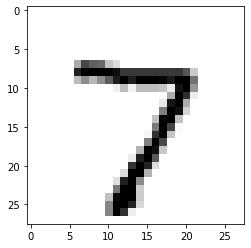

In [29]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(y_test[0], cmap="gray_r")
plt.show()

In [21]:
# generate image noise
import numpy as np

x_train = y_train + np.random.normal(0, 0.2, (60000, 28, 28))
x_test = y_test + np.random.normal(0, 0.2, (10000, 28, 28))

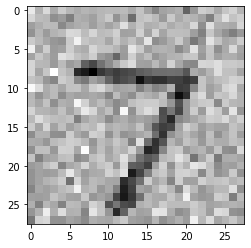

In [30]:
plt.imshow(x_test[0], cmap="gray_r")
plt.show()

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

encoder = Sequential()
encoder.add(Conv2D(1, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(28, 28, 1)))
encoder.add(MaxPooling2D(pool_size=(2, 2)))
encoder.add(Conv2D(2, kernel_size=(3, 3), padding="same", activation="relu"))
encoder.add(MaxPooling2D(pool_size=(2, 2)))

decoder = Sequential()
decoder.add(Conv2D(2, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(7, 7, 2)))
decoder.add(UpSampling2D(size=(2, 2)))
decoder.add(Conv2D(4, kernel_size=(3, 3), padding="same", activation="relu"))
decoder.add(UpSampling2D(size=(2, 2)))
decoder.add(Conv2D(1, kernel_size=(3, 3), padding="same", activation="sigmoid"))

model = Sequential()
model.add(encoder)
model.add(decoder)

model.compile(optimizer="rmsprop", loss="mse")

In [25]:
model.fit(x_train.reshape(-1, 28, 28, 1), y_train.reshape(-1, 28, 28, 1), epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.0430
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0206
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0175
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0167
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0165
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0162
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0160
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0159
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0158
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0157


1/1 [==============================] - 0s 118ms/step


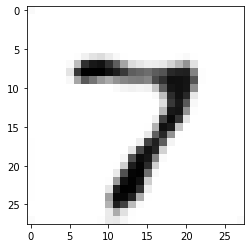

In [26]:
encoded = encoder.predict(x_test[0].reshape(1, 28, 28, 1))
decoded = decoder.predict(encoded)

plt.imshow(decoded.reshape(28, 28), cmap="gray_r")
plt.show()

In [27]:
y_test_pred = model.predict(x_test.reshape(-1, 28, 28, 1))

313/313 [==============================] - 1s 3ms/step


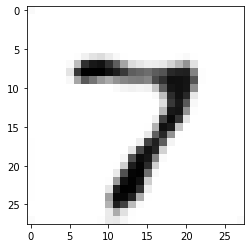

In [28]:
plt.imshow(y_test_pred[0].reshape(28, 28), cmap="gray_r")
plt.show()